1а. После каждого опыта необходимо вычислить ряд распределения апостериорных вероятностей гипотез – какое слово загадано. Представить соответствующие результаты визуально на графике в форме изменения с течением опытов диаграмм распределений вероятностей гипотез.

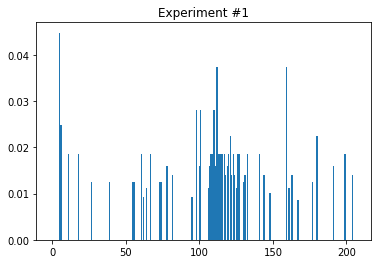

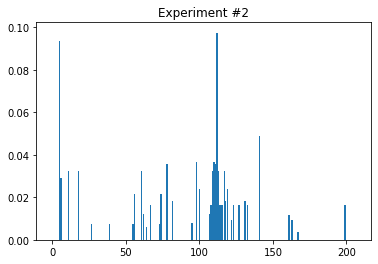

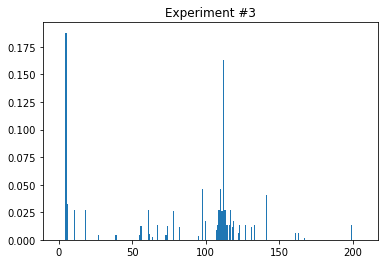

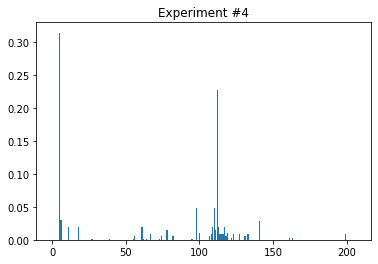

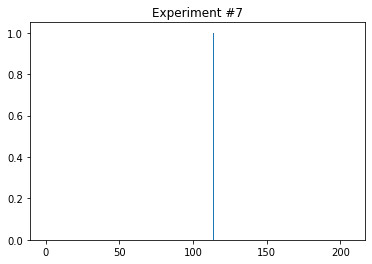

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

voiceless = ['п', 'ф', 'т', 'с', 'ш', 'к', 'ч', 'щ', 'ц', 'х']
voiced = ['б', 'в', 'д', 'з', 'ж', 'г', 'л', 'м', 'н', 'р', 'й']
vowels = ['а', 'о', 'и', 'е', 'ё', 'э', 'ы', 'у', 'ю', 'я']
signs = ['ь', 'ъ']


def letter_info(character):
    if character == '':
        return ''
    if character in signs:
        return 's'
    if character.isupper():
        s = 'u'
    else:
        s = 'l'
    character_l = character.lower()
    if character_l in voiceless:
        s = s + 'cs'
    elif character_l in voiced:
        s = s + 'cd'
    elif character_l in vowels:
        s = s + 'v'
    return s


#Вероятность получить букву из слова
def p_letter(word, letter):
    return len([a for a in word if a.lower() == letter]) / len(word)


def p_info(word, position, info):
    if position >= len(word):
        return 0
    if info != letter_info(word[position]):
        return 0
    else:
        return 1 / len(word)


f = open('task_1_words.txt', 'r')
first_line = f.readline().split(': ')[1].split(', ')
word_type = first_line[0] + '.txt'
n_exp = int(first_line[1].split(' = ')[1])

f.readline()
info_list = []
for i in range(n_exp):
    dct = {}
    s = f.readline().split(': ')
    if len(s) == 2:
        dct['letter'] = s[1][1]
    else:
        dct['position'] = int(s[1]) - 1
        x = ''
        for item in s[2].rstrip().split(' '):
            if item == 'заглавная':
                x = 'u'
            if item == 'строчная':
                x = 'l'
            if item == 'гласная':
                x = x + 'v'
            if item == 'звонкая':
                x = x + 'cd'
            if item == 'глухая':
                x = x + 'cs'
        dct['info'] = x
    info_list.append(dct)
f.close()

list_of_words = []
with open(word_type, 'r', encoding='utf-8') as f:
    for line in f:
        list_of_words.append(line.rstrip())

probs = {}
for word in list_of_words:
    probs[word] = 1 / len(list_of_words)

possible_words = [word for word in list_of_words]

step = 0
max_prob = max(probs.values())
for item in info_list:
    step += 1
    if 'letter' in item:
        for word in possible_words:
            probs[word] *= p_letter(word, item['letter'])
    else:
        for word in possible_words:
            probs[word] *= p_info(word, item['position'], item['info'])
    s = sum(probs.values())
    for word in possible_words:
        probs[word] /= s
    possible_words = [word for word in possible_words if probs[word] != 0]
    if max(probs.values()) / max_prob > 1.5:
        plt.title('Experiment #' + str(step))
        plt.bar(range(len(probs)), list(probs.values()))
        plt.show()
        max_prob = max(probs.values())
    if len(possible_words) == 1:
        break

График выводится, только если достаточно сильно поменялась максимальная вероятность гипотез.
Когда остается одно слово, алгоритм заканчивает работу.

1b. Определять после каждого опыта, какое слово имеет наибольшую вероятность. Визуализировать эволюцию изменения наиболее вероятного слова.

Text(0.5, 1.0, 'Maximum probability hypothesis')

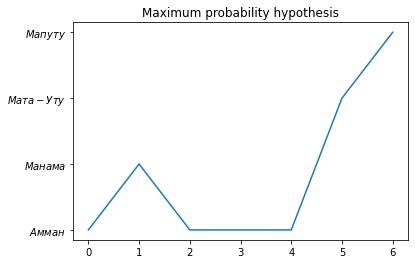

In [2]:
possible_words = list_of_words
list_of_codes = []
best_words = {'': 0}
for item in info_list:
    if 'letter' in item:
        for word in possible_words:
            probs[word] = p_letter(word, item['letter'])
    else:
        for word in possible_words:
            probs[word] = p_info(word, item['position'], item['info'])
    s = sum(probs.values())
    for word in possible_words:
        probs[word] /= s
    possible_words = [word for word in possible_words if probs[word] != 0]
    word = max(probs, key=probs.get)
    if word in best_words:
        list_of_codes.append(best_words[word])
    else:
        best_words[word] = max(best_words.values()) + 1
        list_of_codes.append(best_words[word])
    if len(possible_words) == 1:
        break
fig, ax = plt.subplots()
ax.set_yticks(range(len(best_words)))
ax.set_yticklabels(
    [['$' + key + '$' for key, value in best_words.items() if value == i][0] for i in range(len(best_words))])
ax.plot(list_of_codes)
ax.set_title('Maximum probability hypothesis')

1с. Построить зависимость числа превалирующих гипотез от числа проведенных опытов.

Text(0.5, 1.0, 'Number of best hypotheses')

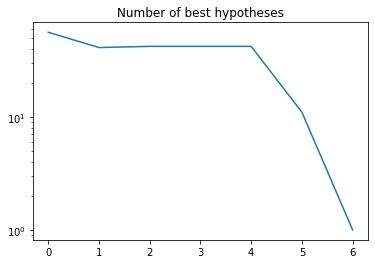

In [3]:
possible_words = list_of_words
list_of_nums = []
for item in info_list:
    if 'letter' in item:
        for word in possible_words:
            probs[word] = p_letter(word, item['letter'])
    else:
        for word in possible_words:
            probs[word] = p_info(word, item['position'], item['info'])
    s = sum(probs.values())
    for word in possible_words:
        probs[word] /= s
    possible_words = [word for word in possible_words if probs[word] != 0]
    num_of_hyps = 0
    total_prob = 0
    for prob in sorted(probs.values(), reverse=True):
        num_of_hyps += 1
        total_prob += prob
        if total_prob > 0.99:
            break
    list_of_nums.append(num_of_hyps)
    if len(possible_words) == 1:
        break
fig, ax = plt.subplots()
ax.plot(list_of_nums)
ax.set_yscale('log')
ax.set_title('Number of best hypotheses')

2a. Рассмотреть каждую букву в слове по отдельности и в качестве гипотез выдвигать то, что это за буква (сам символ, заглавная/строчная, гласная/согласная и т.д.). Для гипотезы о том, что за символ, общее количество гипотез равно общему количеству возможных символов, для гипотез о классах буквы количество гипотез равно количеству классов.
Вычислить для каждой из букв распределения вероятностей гипотез после каждого опыта. Представить результаты визуально по аналогии с п. 1а.

Проблема с неизвестным количеством букв решается следующим образом. 
Количество букв не превышает максимальную длину слова в словаре. 
Далее, если на каком-либо этапе оказалось, что вероятность иметь на позиции '' (то есть не иметь накакого символа) равна 1, 
то процедура останавливается, следующие позиции нас не интересуют.


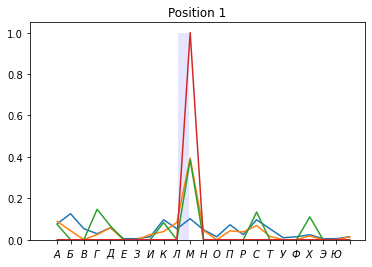

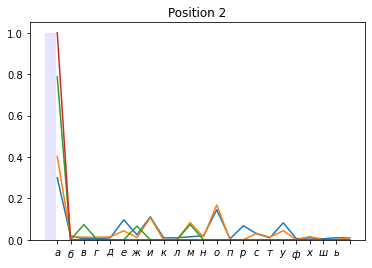

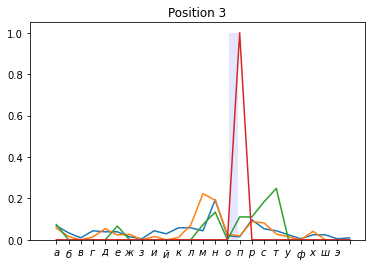

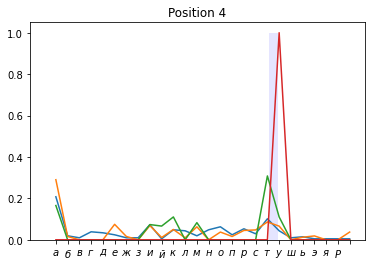

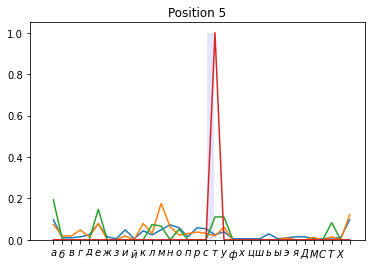

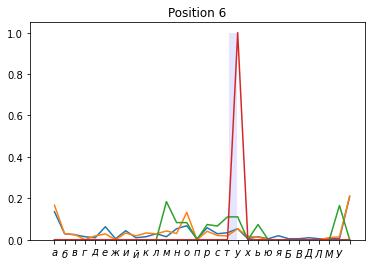

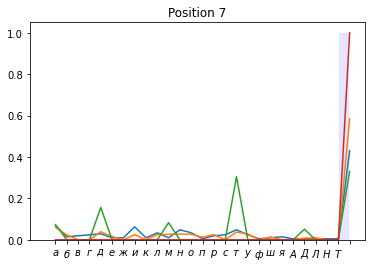

In [4]:
#Гипотеза о символе
def symbol_at_position(word, position):
    if position < len(word):
        return word[position]
    return ''


probs = {}
N = max([len(word) for word in list_of_words])

for position in range(N):
    hyps = ['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у',
            'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ы', 'ъ', 'э', 'ю', 'я']
    hyps = hyps + [x.upper() for x in hyps] + ['']
    for word in list_of_words:
        probs[word] = 1 / len(list_of_words)
    possible_words = list_of_words
    prob_letter = {}
    num_of_possible_letters = 67
    for hyp in hyps:
        prob_letter[hyp] = sum([probs[word] for word in possible_words if symbol_at_position(word, position) == hyp])
    hyps = [h for h in hyps if prob_letter[h] != 0]
    step = 0
    plt.plot([prob_letter[let] for let in hyps])
    plt.title('Position ' + str(position + 1))
    xticks_list = ['$' + let + '$' for let in hyps[:-1]] + ['']
    plt.xticks(range(xticks_list.__len__()), xticks_list)
    for item in info_list:
        step += 1
        if 'letter' in item:
            for word in possible_words:
                probs[word] = p_letter(word, item['letter'])
        else:
            for word in possible_words:
                probs[word] = p_info(word, item['position'], item['info'])
        s = sum(probs.values())
        for word in possible_words:
            probs[word] /= s
        for hyp in hyps:
            prob_letter[hyp] = sum(
                [probs[word] for word in possible_words if symbol_at_position(word, position) == hyp])
        possible_words = [word for word in possible_words if probs[word] != 0]
        if len([x for x in prob_letter.values() if x != 0]) / num_of_possible_letters < 0.6:
            plt.plot([prob_letter[let] for let in hyps])
            num_of_possible_letters = len([x for x in prob_letter.values() if x != 0])
        if len(possible_words) == 1:
            break
        if num_of_possible_letters == 1:
            break
    plt.bar([k - 0.5 for k in range(len(hyps))], [prob_letter[let] for let in hyps], alpha=0.1, color='blue')
    plt.show()
    if prob_letter[''] == 1:
        break


Гипотеза о типе символа:

1) заглавная гласная (uv)

2) заглавная согласная звонкая (ucd)

3) заглавная согласная глухая (ucs)

4) строчная гласная (lv)

5) строчная согласная звонкая (lcd)

6) строчная согласная глухая (lcs)

7) знак (s) 8) нет символа ()

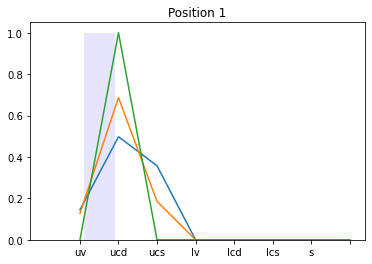

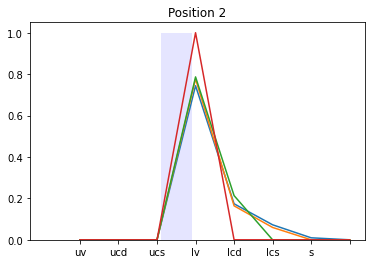

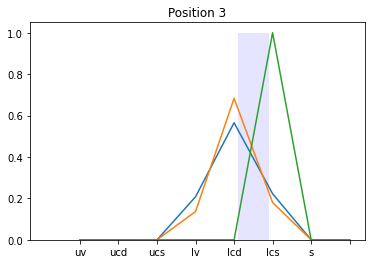

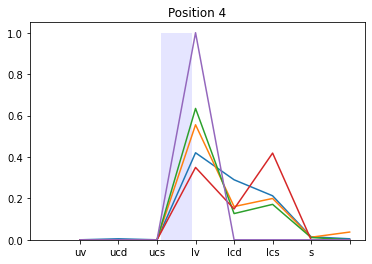

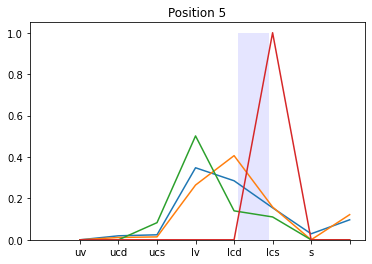

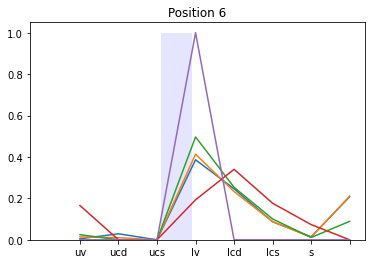

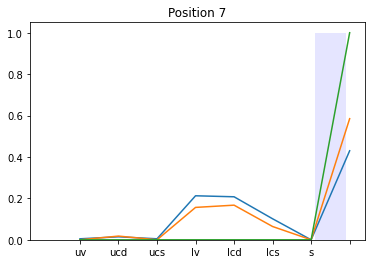

In [5]:
probs = {}
hyps = ['uv', 'ucd', 'ucs', 'lv', 'lcd', 'lcs', 's', '']

for position in range(N):
    for word in list_of_words:
        probs[word] = 1 / len(list_of_words)
    possible_words = list_of_words
    prob_letter_type = {}
    num_of_possible_letter_types = 8
    for hyp in hyps:
        prob_letter_type[hyp] = sum(
            [probs[word] for word in possible_words if letter_info(symbol_at_position(word, position)) == hyp])
    step = 0
    plt.plot([prob_letter_type[hyp] for hyp in hyps])
    plt.title('Position ' + str(position + 1))
    plt.xticks(range(8), hyps)
    for item in info_list:
        step += 1
        if 'letter' in item:
            for word in possible_words:
                probs[word] = p_letter(word, item['letter'])
        else:
            for word in possible_words:
                probs[word] = p_info(word, item['position'], item['info'])
        s = sum(probs.values())
        for word in possible_words:
            probs[word] /= s
        for hyp in hyps:
            prob_letter_type[hyp] = sum(
                [probs[word] for word in possible_words if letter_info(symbol_at_position(word, position)) == hyp])
        possible_words = [word for word in possible_words if probs[word] != 0]
        if len([x for x in prob_letter_type.values() if x != 0]) < num_of_possible_letter_types:
            plt.plot([prob_letter_type[hyp] for hyp in hyps])
            num_of_possible_letter_types = len([x for x in prob_letter_type.values() if x != 0])
        if len(possible_words) == 1:
            break
        if num_of_possible_letter_types == 1:
            break
    plt.bar([k - 0.5 for k in range(8)], [prob_letter_type[hyp] for hyp in hyps], alpha=0.1, color='blue')
    plt.show()
    if prob_letter_type[''] == 1:
        break


2b. Определить для каждой буквы наиболее вероятную гипотезу на каждом шаге и визуализировать эволюцию этой гипотезы.

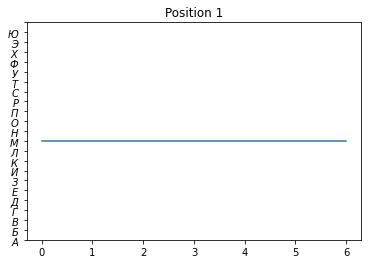

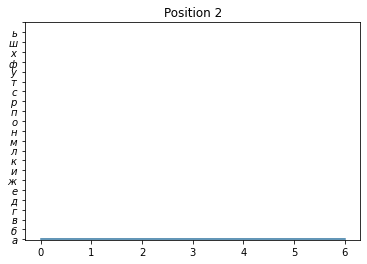

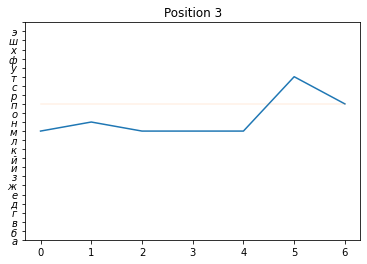

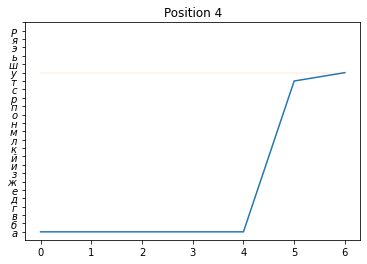

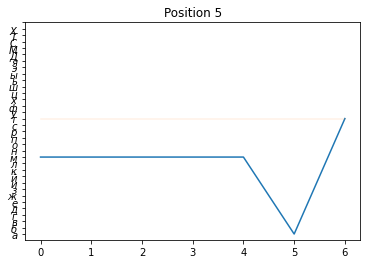

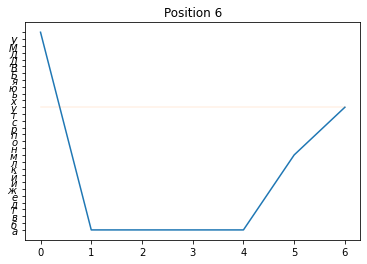

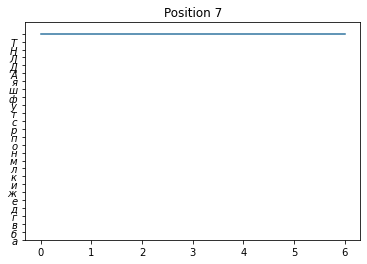

In [6]:
#Гипотеза о символе

probs = {}
for position in range(N):
    hyps = ['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у',
            'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ы', 'ъ', 'э', 'ю', 'я']
    hyps = hyps + [x.upper() for x in hyps] + ['']
    for word in list_of_words:
        probs[word] = 1 / len(list_of_words)
    possible_words = list_of_words
    prob_letter = {}

    for hyp in hyps:
        prob_letter[hyp] = sum([probs[word] for word in possible_words if symbol_at_position(word, position) == hyp])
    hyps = [h for h in hyps if prob_letter[h] != 0]
    step = 0
    best_hyps = []
    for item in info_list:
        step += 1
        if 'letter' in item:
            for word in possible_words:
                probs[word] = p_letter(word, item['letter'])
        else:
            for word in possible_words:
                probs[word] = p_info(word, item['position'], item['info'])
        s = sum(probs.values())
        for word in possible_words:
            probs[word] /= s
        for hyp in hyps:
            prob_letter[hyp] = sum(
                [probs[word] for word in possible_words if symbol_at_position(word, position) == hyp])
        possible_words = [word for word in possible_words if probs[word] != 0]
        best_hyps.append(hyps.index(max(prob_letter, key=prob_letter.get)))
        if len(possible_words) == 1:
            break
    plt.plot(best_hyps)
    plt.plot([best_hyps[-1]] * len(best_hyps), alpha=0.1)
    yticks = ['$' + hyp + '$' for hyp in hyps[:-1]] + ['']
    plt.yticks(range(len(yticks)), yticks)
    plt.title('Position ' + str(position + 1))
    plt.show()
    if prob_letter[''] == 1:
        break


Получили слово "Мапуту"

Гипотеза о типе символа:

1) заглавная гласная (uv)

2) заглавная согласная звонкая (ucd)

3) заглавная согласная глухая (ucs)

4) строчная гласная (lv)

5) строчная согласная звонкая (lcd)

6) строчная согласная глухая (lcs)

7) знак (s) 8) нет символа ()

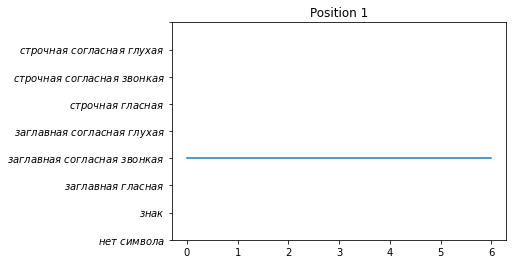

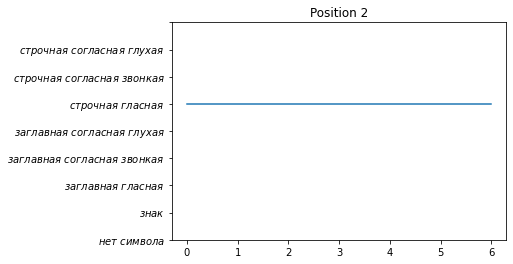

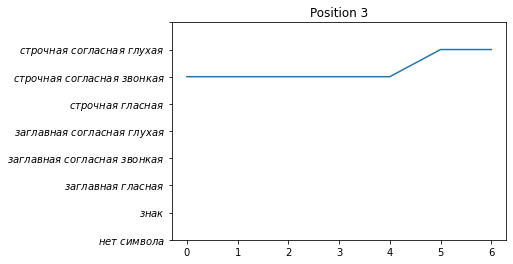

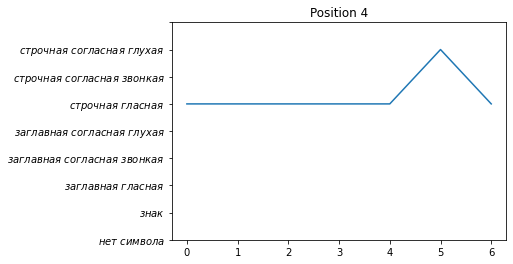

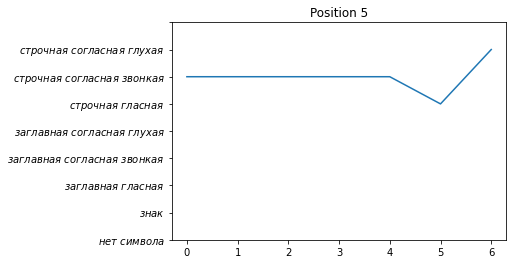

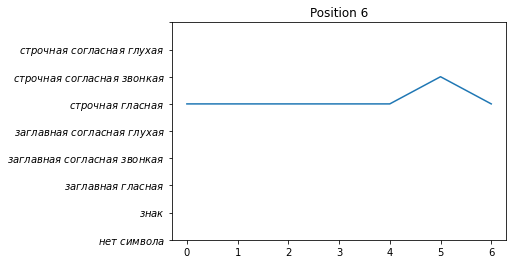

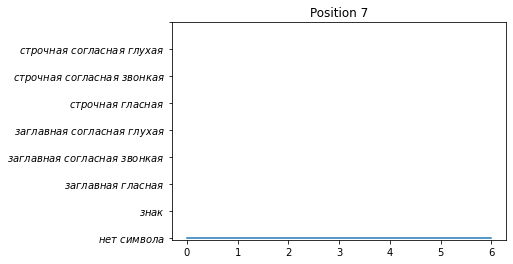

In [7]:
probs = {}
hyps = ['', 's', 'uv', 'ucd', 'ucs', 'lv', 'lcd', 'lcs']
hyps_russian = ['$нет$ $символа$', '$знак$', '$заглавная$ $гласная$', '$заглавная$ $согласная$ $звонкая$',
                '$заглавная$ $согласная$ $глухая$', '$строчная$ $гласная$', '$строчная$ $согласная$ $звонкая$',
                '$строчная$ $согласная$ $глухая$']
dct = {'': 0, 's': 1, 'uv': 2, 'ucd': 3, 'ucs': 4, 'lv': 5, 'lcd': 6, 'lcs': 7}
for position in range(N):
    for word in list_of_words:
        probs[word] = 1 / len(list_of_words)
    possible_words = list_of_words
    prob_letter_type = {}
    num_of_possible_letter_types = 8
    for hyp in hyps:
        prob_letter_type[hyp] = sum(
            [probs[word] for word in possible_words if letter_info(symbol_at_position(word, position)) == hyp])
    step = 0
    best_hyps = []
    for item in info_list:
        step += 1
        if 'letter' in item:
            for word in possible_words:
                probs[word] = p_letter(word, item['letter'])
        else:
            for word in possible_words:
                probs[word] = p_info(word, item['position'], item['info'])
        s = sum(probs.values())
        for word in possible_words:
            probs[word] /= s
        for hyp in hyps:
            prob_letter_type[hyp] = sum(
                [probs[word] for word in possible_words if letter_info(symbol_at_position(word, position)) == hyp])
        possible_words = [word for word in possible_words if probs[word] != 0]
        best_hyps.append(dct[max(prob_letter_type, key=prob_letter_type.get)])
        if len(possible_words) == 1:
            break
        if num_of_possible_letter_types == 1:
            break
    plt.plot(best_hyps)
    plt.yticks(range(9), hyps_russian + [''])
    plt.title('Position ' + str(position + 1))
    plt.show()
    if prob_letter_type[''] == 1:
        break


Получили типы букв как в слове "Мапуту"

2с. Объединить результаты для всех букв, получить наиболее вероятное слово и сравнить его с полученным п.1. Провести анализ сравнения.

См. выше

3a. Определить приближенно частоту тех или иных сообщаемых символов. Исходя из этого можно оценить примерно, сколько каждого из символов в слове. Затем сопоставьте эту информацию с тем, что ведущий говорит о позициях букв и их типе. В результате можно сузить количество возможных слов, используемых в качестве гипотез.

In [8]:
def convert_letter_class(letter):
    if letter == 'uv':
        return 'заглавная гласная'
    if letter == 'ucd':
        return 'заглавная согласная звонкая'
    if letter == 'ucs':
        return 'заглавная согласная глухая'
    if letter == 'lv':
        return 'строчная гласная'
    if letter == 'lcd':
        return 'строчная согласная звонкая'
    else:
        return 'строчная согласная глухая'


fr_letters = {}
#Это типы букв по позициям
types_of_letters = {}
for item in info_list:
    if 'letter' in item:
        if item['letter'] in fr_letters:
            fr_letters[item['letter']] += 1
        else:
            fr_letters[item['letter']] = 1
    else:
        types_of_letters[item['position']] = item['info']
fr_min = min(fr_letters.values())

letters_of_word = {}
for letter in fr_letters:
    letters_of_word[letter] = int(fr_letters[letter] / fr_min)

print('Letters:')
print(letters_of_word)
print('Types:')
print({key: convert_letter_class(value) for key, value in types_of_letters.items()})

Letters:
{'м': 1, 'а': 1, 'т': 1, 'п': 1, 'у': 2}
Types:
{2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


3b. Составьте для каждого слова из базы теоретические профили, содержащие в себе некоторую статистику – количество символов каждого типа, позиция с учетом типа символа. Далее из п. 3а определите аналогичный экспериментальный профиль.

3c. Сопоставить теоретические профили с экспериментальным и найдите их наиболее правдоподобное соответствие в форме слова (слов). Сравнить с полученными результатами в п. 1 и 2. Провести анализ сравнения.

In [9]:
for w in list_of_words:
    letters = [w[i] for i in range(len(w))]
    n = len(letters)
    types = {}
    for i in range(n):
        types[i] = letter_info(letters[i])
    check = types == types_of_letters
    for l in letters_of_word:
        if len([x for x in letters if x.lower() == l]) != letters_of_word[l]:
            check = False
            break
    if check:
        print(w)


Мапуту


Подошло по профилю только одно слово - Мапуту.

3d. Привести графики изменения экспериментальных профилей для различного количества опытов.

Types:  {}


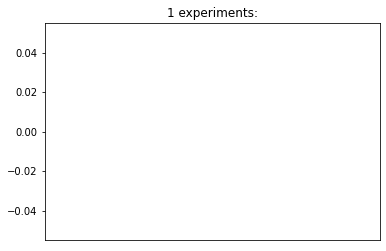

Types:  {}


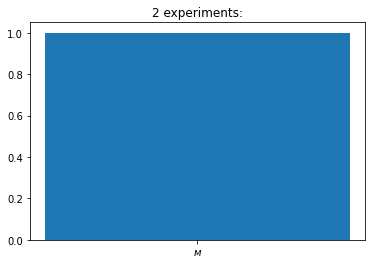

Types:  {}


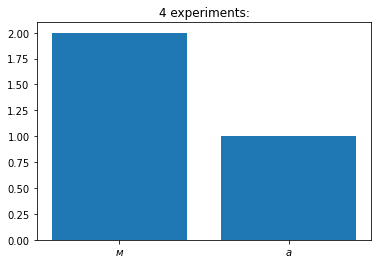

Types:  {}


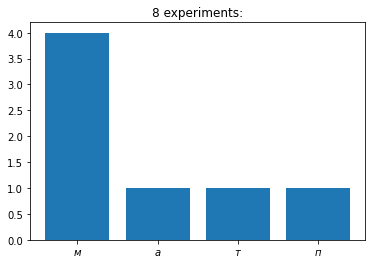

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая'}


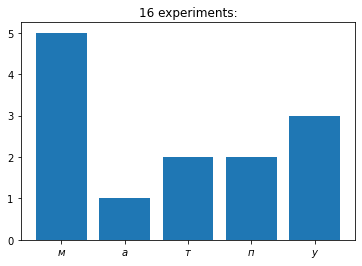

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая'}


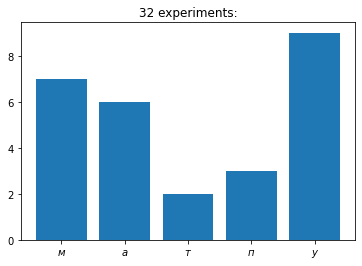

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная'}


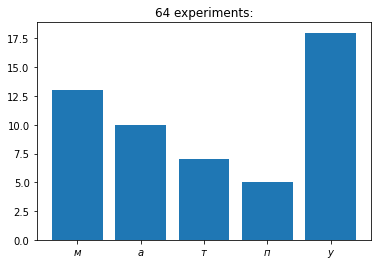

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


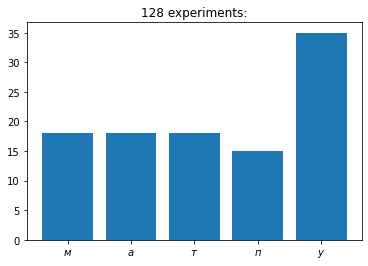

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


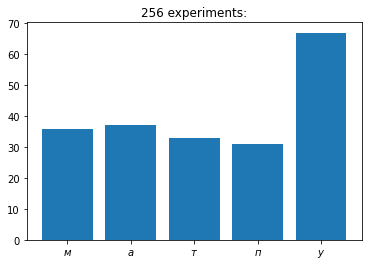

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


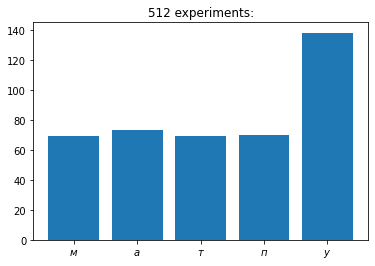

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


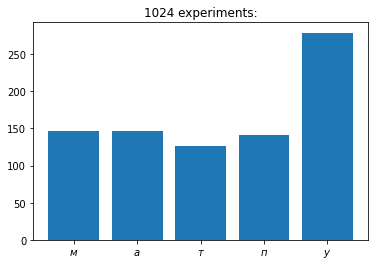

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


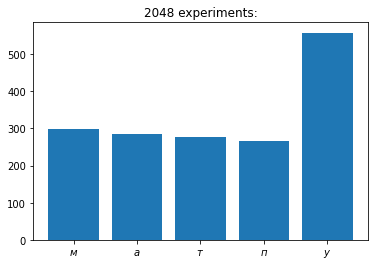

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


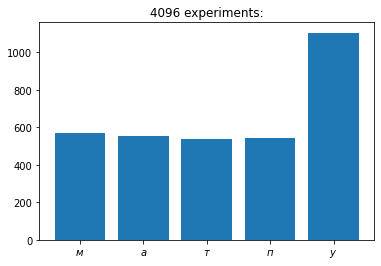

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


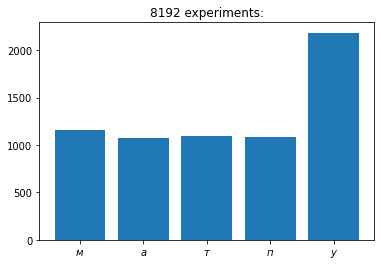

Types:  {2: 'строчная согласная глухая', 0: 'заглавная согласная звонкая', 4: 'строчная согласная глухая', 3: 'строчная гласная', 1: 'строчная гласная', 5: 'строчная гласная'}


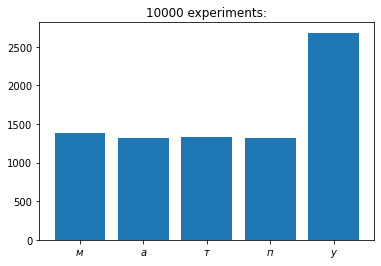

In [10]:
list_of_letters = []
for i in range(n_exp):
    fr_letters = {l: 0 for l in list_of_letters}
    types_of_letters = {}
    for item in info_list[:i]:
        if 'letter' in item:
            if item['letter'] in fr_letters:
                fr_letters[item['letter']] += 1
            else:
                fr_letters[item['letter']] = 1
                list_of_letters.append(item['letter'])
        else:
            types_of_letters[item['position']] = item['info']
    if i in [2 ** j - 1 if j != 14 else 9999 for j in range(1, 15)] or i == 0:
        print('Types: ', {key: convert_letter_class(value) for key, value in types_of_letters.items()})
        plt.title(str(i + 1) + ' experiments:')
        plt.bar(range(len(fr_letters)), [fr_letters[l] for l in list_of_letters])
        plt.xticks(range(len(fr_letters)), ['$' + l + '$' for l in list_of_letters])
        plt.show()

На последнем графике четко видно, что частоты всех букв примерно одинаковы, за исключением буквы у. Это объясняется тем, что в загаданном слове эта буква встречается 2 раза.



